In [1]:
# !ls anpr_ocr__train/img

In [1]:
import os
from os.path import join
import json
import random
from glob import glob
from collections import Counter
import itertools
import re
import datetime
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from keras import backend as K
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input, Dense, Activation
from keras.layers import Reshape, Lambda
from keras.layers.merge import add, concatenate
from keras.models import Model, load_model
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.utils.data_utils import get_file
from keras.preprocessing import image
import keras.callbacks
import cv2
%matplotlib inline

/home/matt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Sample Image

In [2]:
import tensorflow as tf
sess = tf.Session()
K.set_session(sess)

In [8]:
# ls ../../data/raw/word_level/a01/a01-011/

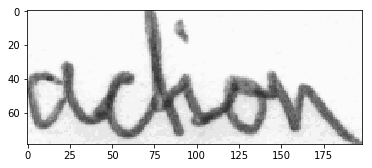

In [7]:
sample_image = '../../data/raw/word_level/a01/a01-011/a01-011-03-06.png'
plt.imshow(cv2.imread(sample_image));

In [4]:
def get_info(tag):
    lens = []
    heights = []
    widths = []
    all_files = glob('anpr_ocr__train/ann/*')
    all_letters = ''
    for filename in all_files:
        f = json.load(open(filename))
        if tag in f['tags']:
            description = f['description']
            print(description)
            height = f['size']['height']
            width = f['size']['width']
            lens.append(len(description))
            all_letters += description
            heights.append(height)
            widths.append(width)
    return Counter(all_letters), lens, heights, widths, all_letters

In [5]:
for tag in ['train', 'val']:
    counts, lens, heights, widths, letters = get_info(tag)
    print('Set:', tag)
    print('Total Images: {}'.format(len(lens)))
    print('number unique letters: {}'.format(len(counts)))
    print('unique letters: {}'.format(' '.join(list(counts.keys()))))
    print('max length: {}'.format(max(lens)))
    print('height: {}'.format(np.mean(heights)))
    print('width: {}'.format(np.mean(widths)))
    print('*'*50)

A280MO40
O271PP38
B120YO29
X481AK26
C085AT36
X817XP16
A157EE72
H145KM97
B653AO68
X040BM74
C267EE76
B538KT29
C762PY85
K752KH44
X264PC06
O201XT17
B123CH17
H611PE07
P653PX23
Y716BP69
H843EY07
Y044TH85
H531YP03
T778MC76
X372XA85
Y060TT79
O031BC17
P323CB50
X461EA84
B157CP35
B635KT05
K444BX03
A654OO16
C616XB22
T118KT26
H657PA74
A013TP30
H150CH07
M474KB70
B703AB89
P437XH07
X188EE43
M166HA01
E527AK86
E312XO50
C076HA30
E001MM77
O258BP20
E336XC04
H173KC44
X164CC65
K018XT18
M373AC44
C301CC10
E467YY82
E016HO04
H164ME79
H772ME88
M086ET80
M310EP20
Y000CX37
E808YA85
C543OT27
Y835BA91
M364OC40
B847PP74
X283XK60
E307XY42
O743BE13
M052MK09
T657PM34
K517XH63
O503KC83
O431KM66
A141CX28
T247TH53
C130CB36
H067HX19
Y562AE17
T634XC43
Y831PY55
M477HO26
X378BX33
Y037AC68
X513OA84
E241XY61
E363PE40
O464PA08
M056KE75
E867EY04
H510MK66
X176EO31
O406AY77
O182KA52
P455OY48
E072MO34
M120XB04
H270YK77
X414CC42
X051PA98
C522KO95
C031YO93
K221YH90
E381BO84
O765BO34
C062MP96
O204BX08
A843OB88
H574HP34
C034OK27
X644EO33
O

H447HB69
Y442XY27
C050KP39
T651MH96
H214OT61
P506YK93
X424HK66
P082PY45
O610TY86
E811HC79
H215MK15
Y402MM97
C424CB20
M245PC27
C320BE25
H572MK37
K630PT56
X058CA35
P351KA70
K043XH78
X677YE53
B841XT24
P545MO87
H670OY46
T806PO22
C134OC61
H230OO95
Y513TB42
T004HM42
P641HA87
M548EC07
C358CH98
H130HA05
T828HK43
X645AH39
E206XE94
H257XA97
B446XO59
C810YT87
A454AA40
O577CM82
E417KX22
O160HY24
O513MH15
E282MC62
P400CA65
M432BE62
A575YY58
H253OY21
K342EY50
A366OY33
P423CX49
A467EM80
A774TY77
X414EP81
O803AP31
X237TE17
T052YA51
M828MA24
C345OY63
Y283EY77
P203EO52
O576HX13
Y613TC31
O881AY52
K270OK43
P177OT56
K157AE02
M215XT79
A367PT91
P166CB72
E713KY16
P532EP33
E842KA71
E258TK25
H665EH69
E668AT68
Y444TB36
C072YH49
O033YC48
K038HT60
M870KP91
T437PT34
A084CE66
A527KM01
E507XE18
B215YY89
B441KM47
T634YB95
T204EO51
X316YX83
C580AY88
M280CA87
A263CP23
X277EO92
M008TC93
A710PA44
E836MY02
B645XC91
B673CY04
M373EH74
Y164XP18
A850YX82
C512CP97
E481HM15
B827EH83
B138BT57
H112YX37
T817OX96
X670XE13
T065KP34
H

B040CT34
E223KX88
B631MC03
Y356AE29
A756MH33
M827PO40
T513MA57
K521TE05
P364HE12
K666CT96
X085CO92
E875EK73
K586KO51
E572TB91
K825YM96
X365AT07
K062ME84
X056MA85
B872EE68
K564PE70
Y161BC61
C368PE52
X748TB69
P535HY54
H388KB16
A826BA82
B152EM68
Y802BX34
Y438KM87
O146KP85
E235YK07
E725BP40
M272BE76
P858HT83
E246TO01
A560TO55
K821HT54
X342YX78
C675TA19
X678ME84
C667AO91
B071PA84
Y582HT83
C620HK57
E175OM03
T521TK65
T878OA92
K231YB13
E063BK92
E638KC02
C500BT73
X600CH04
K822MP83
T225MP61
C107CB84
H354KB62
Y737AE29
M754OC45
H307AP52
Y668TX90
O735OT75
T250PT06
Y176HH19
P534AT53
B748PY18
H068CM44
T302TM44
A460YH86
K632TE10
Y723OY54
A021YO26
H438ET71
M685YX30
Y764HH19
C525AK75
H577MA77
K640KA25
T585HK18
M523KX36
X013XC57
T211KH06
C082OK26
A536PE30
H535AY66
E226MK68
C072XX08
P678KX05
B781YB07
M377YA64
T110KO26
M516OA58
X337TK72
A734OP06
X383YT36
M746PE25
O616XH59
H346CB62
B682TT52
Y334HA89
E783KK83
P272PK85
A562HE88
C417PO22
P157YK42
O437BB50
K235BK35
B701EE58
P141XB23
B301YP64
Y301YE18
B037KB54
T

K543KK76
A448OC84
M602TO51
H860KB57
Y628EY29
H836YM25
H404YA87
K722HX68
O385AE02
C005MT54
M274AB64
Y840HK53
H355CE50
O150PB56
M164TC95
H801KP91
B578PO87
B711OA24
B243BT66
A773XB19
Y847HT64
T672CT84
O583BH04
T443KH10
O371EY57
P372AE24
B583AE09
P375XC74
O010EO07
C062PP22
K542PP47
P847TH09
E171TO15
P070YX06
Y688EO59
E624MM01
A110ME93
K323TM67
C854XC63
M774YK25
A812KB26
P850PY37
P856BY31
H616OA97
B187EE52
P750HP96
E523BH64
X534MK45
T513AM88
A684AY87
E336PO01
B418TO41
O784YO13
Y516HH79
K381EM96
E571KP90
H348OC17
T384PK96
H258KB76
P667CC09
Y843HX40
O362YT50
E351KP11
A733EE16
T303BB82
T652PP60
Y324EP23
B362AC56
E804HY86
P370BT65
C314MY21
O613PO51
P702HY50
E580AC47
Y335CH68
O555YY73
B103KT72
H200CB46
M272TC85
E085XK31
O534HM42
X202MT17
T574MY62
H180KX40
A823YA20
A752BP64
C622CA81
C838KE25
T634BA84
M188EX93
Y360PY25
H214BP17
O224PO72
A482AC36
X264HB45
E881YE42
C056YC87
O041CP68
O462PB95
H611CM91
P074OC79
X763EP70
B046HT19
P126EK33
H834PB54
A462YO54
X331KE04
E731MH96
Y128XP95
A184KM53
O171XP85
O

P531MT21
C452KH61
C436XY65
M320CA54
P730EO50
H666AH48
H315EC40
O723HA90
Y306HB46
M022MB98
K525XX39
A418BM28
K722PH15
P435CO20
O170EH39
B536OT73
X256TE75
M711HO93
B717TT98
E814CP52
Y273MY08
X303CO14
P180EM67
X347OA04
P248OB09
Y267BO83
B638YM36
T724PB42
O462XP50
O621CC26
P365KM80
O641CE21
O324EA54
T825TT68
C161PK05
P647MX25
B204EE18
X072CM61
P443AT97
M546CY46
M543CM50
X437HM90
H322MO32
C584OM27
M402CP80
A876HM83
M355BP10
T175TK95
P772AC06
Y136AO02
O458ET31
O335HY06
Y471XE73
B037ET94
H870HA38
E603TO13
A862CX43
C683YA19
O433YK69
P058BC27
Y484OE74
K058KB12
Y355EM71
T486XM96
P520MA82
C043HC37
A321BT94
H472YA74
T424PC72
H273OB42
T575TX14
A334EM16
P042HX59
P223TX42
C162MH55
T302HY69
B547CM28
O680YK01
Y573OK96
B305TK41
Y200TB89
X268PO01
B833PK39
B725MH57
M042AX54
P017TM92
E688KM52
E385AP90
H710AM23
Y055TM55
M015HH01
X867YX29
H252EA08
T525BY35
H882YP20
H738KX55
E605OY96
O737BB69
K574MO39
E257AO50
X258MO58
O150HM39
C684YP37
C432KX27
O727OK67
K743EY20
P225YP65
C450TE35
K572HX28
X070XH97
B672HP40
T

B152EM68
E235YK07
E725BP40
C500BT73
Y668TX90
K640KA25
X013XC57
E226MK68
P141XB23
O611AK84
P064MM77
H770EY38
B278KH95
O766HB61
A038YH92
T168AM56
A783CE63
C811YA90
P323KK26
O072BY86
B082TO10
B674XT71
H175TE63
E863BA41
B857BC20
A325BC74
T424XC95
O041EP66
E845TB61
M675CM42
O713OM55
E465YM55
M123KP22
C517YY53
B161AX26
B235KY46
T167EO43
T784HC88
H405PC98
K832YM06
T861PE69
H641YX56
C411XE54
E718EK78
B543XP71
E352TK86
T676CP06
C431XT61
X018AT64
K387PH63
X521BT18
C163YE35
H534XM55
O655AO29
Y548AO25
H254YX84
X822TY41
H211KB67
Y065EC11
A277PX13
X670TH05
H542OO51
T267BK57
X644BC48
A460YA24
C865AP63
O341PO72
C814MB83
H417TC44
H066KT65
B651BY79
E357BY75
C082YB66
K008XY17
A378CO51
P337KX23
P248AH20
X275CP58
H353YO05
B004KK21
H388YA29
O123HK15
Y661EC72
C887XC96
O737KB71
X728OK31
B636OX23
A601TE86
O027PP20
E583BH02
T543YK96
P331ME24
C713MB15
K447XT07
M170HX62
M712CE73
B413EK33
T434YB11
P212EH51
X525KK50
P518BY34
P543YP97
K206MA34
T676PP46
C756XX17
X523BH66
E304OA67
A133EC60
O184AB21
M810OM92
T314KX29
O

In [1]:
letters

In [7]:
def labels_to_text(labels):
    return ''.join(list(map(lambda x: letters[int(x)], labels)))

def text_to_labels(text):
    return list(map(lambda x: letters.index(x), text))

def is_valid_str(s):
    for ch in s:
        if not ch in letters:
            return False
    return True

class TextImageGenerator:
    
    def __init__(self, 
                 dirpath,
                 tag,
                 img_w, img_h, 
                 batch_size, 
                 downsample_factor,
                 max_text_len=8):
        
        self.img_h = img_h
        self.img_w = img_w
        self.batch_size = batch_size
        self.max_text_len = max_text_len
        self.downsample_factor = downsample_factor
        
        img_dirpath = join(dirpath, 'img')
        ann_dirpath = join(dirpath, 'ann')
        self.samples = []
        for filename in os.listdir(img_dirpath):
            name, ext = os.path.splitext(filename)
            if ext in ['.png', '.jpg']:
                img_filepath = join(img_dirpath, filename)
                json_filepath = join(ann_dirpath, name + '.json')
                ann = json.load(open(json_filepath, 'r'))
                description = ann['description']
                tags = ann['tags']
                if tag not in tags:
                    continue
                if is_valid_str(description):
                    self.samples.append([img_filepath, description])
        
        self.n = len(self.samples)
        self.indexes = list(range(self.n))
        self.cur_index = 0
        
    def build_data(self):
        self.imgs = np.zeros((self.n, self.img_h, self.img_w))
        self.texts = []
        for i, (img_filepath, text) in enumerate(self.samples):
            img = cv2.imread(img_filepath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (self.img_w, self.img_h))
            img = img.astype(np.float32)
            img /= 255
            # width and height are backwards from typical Keras convention
            # because width is the time dimension when it gets fed into the RNN
            self.imgs[i, :, :] = img
            self.texts.append(text)
        
    def get_output_size(self):
        return len(letters) + 1
    
    def next_sample(self):
        self.cur_index += 1
        if self.cur_index >= self.n:
            self.cur_index = 0
            random.shuffle(self.indexes)
        return self.imgs[self.indexes[self.cur_index]], self.texts[self.indexes[self.cur_index]]
    
    def next_batch(self):
        while True:
            # width and height are backwards from typical Keras convention
            # because width is the time dimension when it gets fed into the RNN
            if K.image_data_format() == 'channels_first':
                X_data = np.ones([self.batch_size, 1, self.img_w, self.img_h])
            else:
                X_data = np.ones([self.batch_size, self.img_w, self.img_h, 1])
            Y_data = np.ones([self.batch_size, self.max_text_len])
            input_length = np.ones((self.batch_size, 1)) * (self.img_w // self.downsample_factor - 2)
            label_length = np.zeros((self.batch_size, 1))
            source_str = []
                                   
            for i in range(self.batch_size):
                img, text = self.next_sample()
                img = img.T
                if K.image_data_format() == 'channels_first':
                    img = np.expand_dims(img, 0)
                else:
                    img = np.expand_dims(img, -1)
                X_data[i] = img
                Y_data[i] = text_to_labels(text)
                source_str.append(text)
                label_length[i] = len(text)
                
            inputs = {
                'the_input': X_data,
                'the_labels': Y_data,
                'input_length': input_length,
                'label_length': label_length,
                #'source_str': source_str
            }
            outputs = {'ctc': np.zeros([self.batch_size])}
            yield (inputs, outputs)

In [8]:
tiger = TextImageGenerator('anpr_ocr__train', 'val', 128, 64, 1, 4)
tiger.build_data()

In [9]:
i = 0
for inp, out in tiger.next_batch():
    print(inp, out)
    i += 1
    if i >=3:
        break

{'the_input': array([[[[0.79215688],
         [0.63921571],
         [0.36470589],
         ...,
         [0.57647061],
         [0.67843139],
         [0.73725492]],

        [[0.47058824],
         [0.38039216],
         [0.22352941],
         ...,
         [0.23529412],
         [0.53725493],
         [0.70588237]],

        [[0.37254903],
         [0.29019609],
         [0.14509805],
         ...,
         [0.19607843],
         [0.50980395],
         [0.68235296]],

        ...,

        [[0.37254903],
         [0.29019609],
         [0.14509805],
         ...,
         [0.19607843],
         [0.50980395],
         [0.68235296]],

        [[0.47058824],
         [0.38039216],
         [0.22352941],
         ...,
         [0.23529412],
         [0.53725493],
         [0.70588237]],

        [[0.79215688],
         [0.63921571],
         [0.36470589],
         ...,
         [0.57647061],
         [0.67843139],
         [0.73725492]]]]), 'the_labels': array([[13.,  3., 14., 38.,  5.,

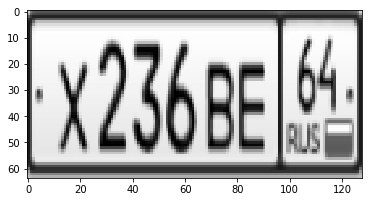

In [10]:
# takes image, the labels, input_length, label length, 

img = inp['the_input'][0, :, :, 0]
plt.imshow(img.T, cmap='gray')

Text generator output (data which will be fed into the neutral network):
1) the_input (image)
DDDD


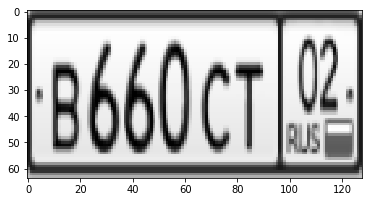

2) the_labels (plate number): B660CT02 is encoded as [0, 38, 38, 3, 21, 120, 3, 2]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8


In [11]:
for inp, out in tiger.next_batch():
    print('Text generator output (data which will be fed into the neutral network):')
    print('1) the_input (image)')
    if K.image_data_format() == 'channels_first':
        img = inp['the_input'][0, 0, :, :]
        
    else:
        img = inp['the_input'][0, :, :, 0]
        print('DDDD')
    
    plt.imshow(img.T, cmap='gray')
    plt.show()
    print('2) the_labels (plate number): %s is encoded as %s' % 
          (labels_to_text(inp['the_labels'][0]), list(map(int, inp['the_labels'][0]))))
    print('3) input_length (width of image that is fed to the loss function): %d == %d / 4 - 2' % 
          (inp['input_length'][0], tiger.img_w))
    print('4) label_length (length of plate number): %d' % inp['label_length'][0])
    break

In [12]:
from keras.layers import Bidirectional, CuDNNGRU

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage:
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)


def get_model(img_w):
    
    img_h = 64

    # Network parameters
    conv_filters = 16
    kernel_size = (3, 3)
    pool_size = 2
    time_dense_size = 32
    rnn_size = 512

    if K.image_data_format() == 'channels_first':
        input_shape = (1, img_w, img_h)
    else:
        input_shape = (img_w, img_h, 1)
        
    batch_size = 32
    downsample_factor = pool_size ** 2
    tiger_train = TextImageGenerator('anpr_ocr__train', 'train', img_w, img_h, batch_size, downsample_factor)
    tiger_train.build_data()
    print(tiger_train.n)
    tiger_val = TextImageGenerator('anpr_ocr__train', 'val', img_w, img_h, batch_size, downsample_factor)
    tiger_val.build_data()
    print(tiger_val.n)
    act = 'relu'
    input_data = Input(name='the_input', shape=input_shape, dtype='float32')
    inner = Conv2D(conv_filters, kernel_size, padding='same',
                   activation=act, kernel_initializer='he_normal',
                   name='conv1')(input_data)
    inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max1')(inner)
    inner = Conv2D(conv_filters, kernel_size, padding='same',
                   activation=act, kernel_initializer='he_normal',
                   name='conv2')(inner)
    inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max2')(inner)

    conv_to_rnn_dims = (img_w // (pool_size ** 2), (img_h // (pool_size ** 2)) * conv_filters)
    inner = Reshape(target_shape=conv_to_rnn_dims, name='reshape')(inner)
    print(inner.shape)
    
    inner = Dense(time_dense_size, activation=act, name='dense1')(inner)
    print(inner.shape)
    
    gru1 = Bidirectional(CuDNNGRU(rnn_size, return_sequences=True, kernel_initializer='he_normal', name='gru1'))(inner)
    gru2 = Bidirectional(CuDNNGRU(rnn_size, return_sequences=True, kernel_initializer='he_normal', name='gru1'))(gru1)
    inner = Dense(tiger_train.get_output_size(), kernel_initializer='he_normal', name='dense2')(gru2)
    y_pred = Activation('softmax', name='softmax')(inner)
    Model(inputs=input_data, outputs=y_pred).summary()
    
    labels = Input(name='the_labels', shape=[tiger_train.max_text_len], dtype='float32')
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')
    # Keras doesn't currently support loss funcs with extra parameters
    # so CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
    
    sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)

    model = Model(inputs=[input_data, labels, input_length, label_length], outputs=loss_out)

    # the loss calc occurs elsewhere, so use a dummy lambda func for the loss
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=sgd)
    
    # captures output of softmax so we can decode the output during visualization
    test_func = K.function([input_data], [y_pred])

    model.fit_generator(generator=tiger_train.next_batch(), 
                        steps_per_epoch=tiger_train.n,
                        epochs=1, 
                        validation_data=tiger_val.next_batch(), 
                        validation_steps=tiger_val.n)

    return model

In [13]:
model = get_model(128)

10799
1084
(?, 32, 256)
(?, 32, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, 128, 64, 1)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 128, 64, 16)       160       
_________________________________________________________________
max1 (MaxPooling2D)          (None, 64, 32, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 64, 32, 16)        2320      
_________________________________________________________________
max2 (MaxPooling2D)          (None, 32, 16, 16)        0         
_________________________________________________________________
reshape (Reshape)            (None, 32, 256)           0         
_________________________________________________________________
dense1 (Dense)               (None, 32, 

In [17]:
# model.save('model.h5')

In [23]:
def decode_batch(out):
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = ''
        for c in out_best:
            if c < len(letters):
                outstr += letters[c]
        ret.append(outstr)
#         print(ret)
    return ret

Predicted: H334ME89
True: H334ME89
Predicted: C378MC80
True: C378MC80
Predicted: C641EB21
True: C641EB21
Predicted: K503CM50
True: K503CM50
Predicted: O731OK54
True: O731OK54
Predicted: T250YY45
True: T250YY45
Predicted: H446PO67
True: H446PO67
Predicted: Y475YP86
True: Y475YP86


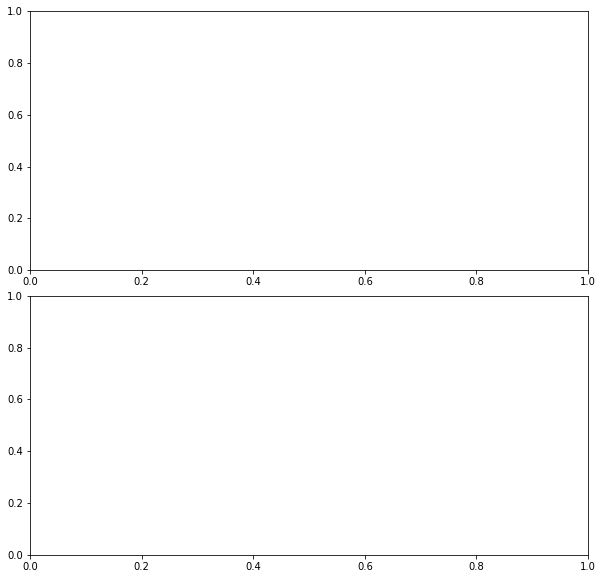

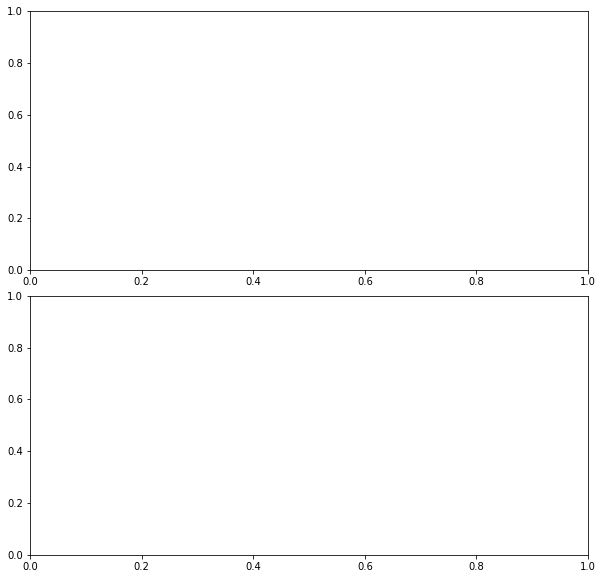

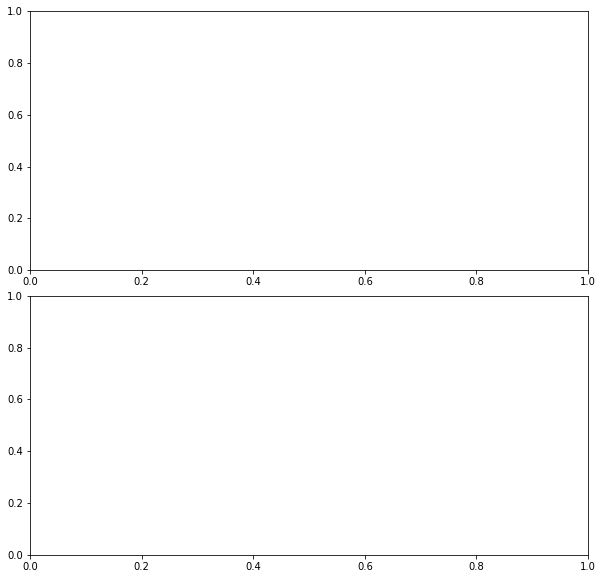

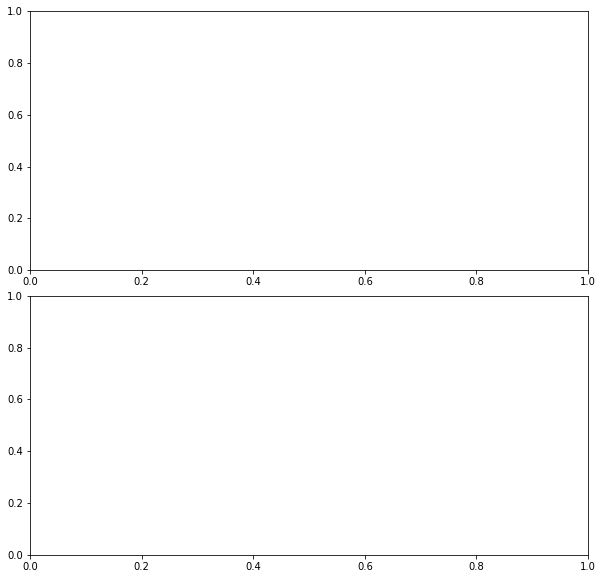

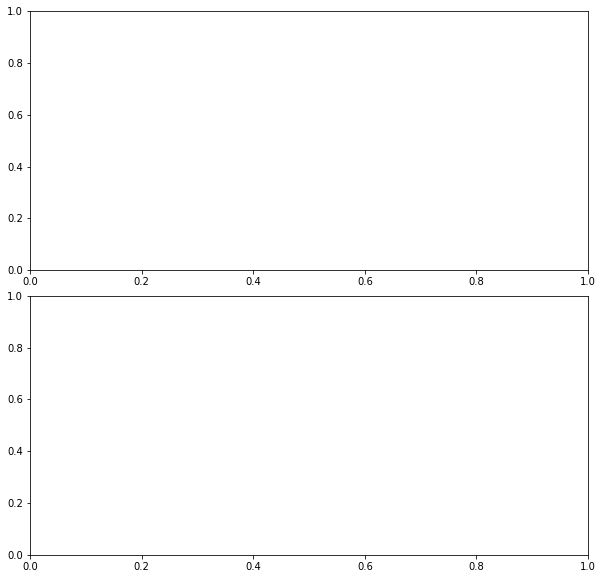

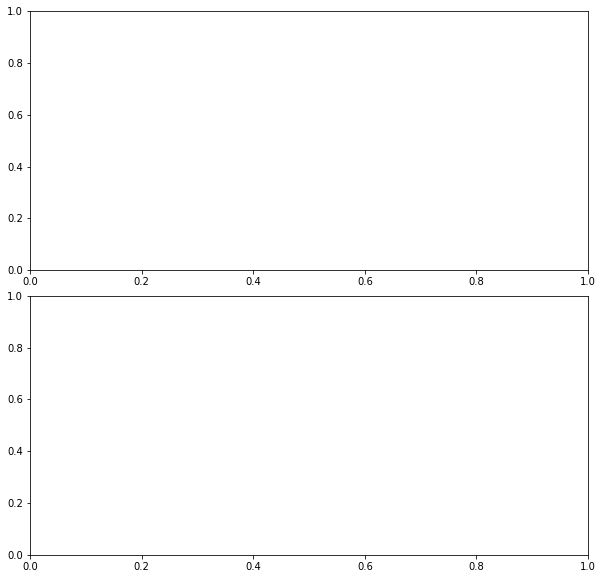

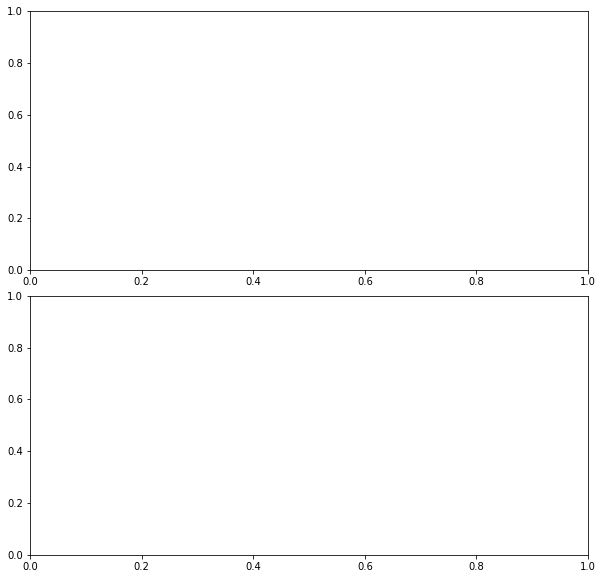

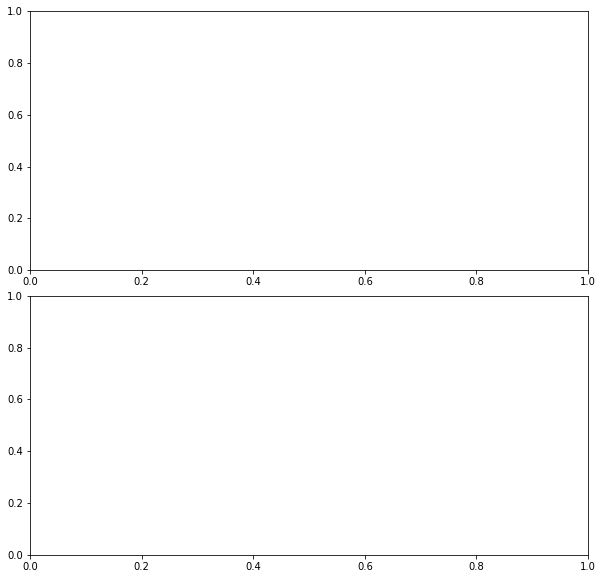

In [25]:
tiger_test = TextImageGenerator('anpr_ocr__test', 'test', 128, 64, 8, 4)
tiger_test.build_data()

net_inp = model.get_layer(name='the_input').input
net_out = model.get_layer(name='softmax').output

for inp_value, _ in tiger_test.next_batch():
    bs = inp_value['the_input'].shape[0]
    X_data = inp_value['the_input']
    net_out_value = sess.run(net_out, feed_dict={net_inp:X_data})
    pred_texts = decode_batch(net_out_value)
    labels = inp_value['the_labels']
    texts = []
    for label in labels:
        text = ''.join(list(map(lambda x: letters[int(x)], label)))
        texts.append(text)
    for i in range(bs):
        fig = plt.figure(figsize=(10, 10))
        outer = gridspec.GridSpec(2, 1, wspace=10, hspace=0.1)
        ax1 = plt.Subplot(fig, outer[0])
        fig.add_subplot(ax1)
        ax2 = plt.Subplot(fig, outer[1])
        fig.add_subplot(ax2)
        print('Predicted: %s\nTrue: %s' % (pred_texts[i], texts[i]))
#         img = X_data[i][:, :, 0].T
#         ax1.set_title('Input img')
#         ax1.imshow(img, cmap='gray')
#         ax1.set_xticks([])
#         ax1.set_yticks([])
#         ax2.set_title('Activations')
#         ax2.imshow(net_out_value[i].T, cmap='binary', interpolation='nearest')
#         ax2.set_yticks(list(range(len(letters) + 1)))
# #         ax2.set_yticklabels(letters + ['blank'])
#         ax2.grid(False)
#         for h in np.arange(-0.5, len(letters) + 1 + 0.5, 1):
#             ax2.axhline(h, linestyle='-', color='k', alpha=0.5, linewidth=1)
        
#         #ax.axvline(x, linestyle='--', color='k')
#         plt.show()
    break

In [1]:
tiger_test.n

NameError: name 'tiger_test' is not defined